This notebook contains code used to generate size plots. Plots do not look exactly like the ones presented in the paper (additional graphical processing was performed in Adobe Illustartor) but come fairly close. We include several additional plots, which did not make it to the final manuscript (due to space constraints). **Related to figures: 1 and S1**

In [114]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Loading necessary libraries.

In [115]:
%%R
library(ggplot2)

Loading data

In [116]:
%%R
original<-read.csv('../Data/original.csv')
mitotic_metaphase<-read.csv('../Data/mitotic_metaphase.csv')

Mapping colors

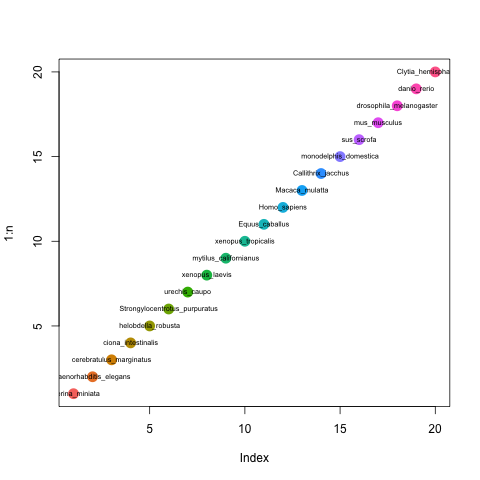

In [117]:
%%R
gg_color_hue <- function(n) {
  #function to generate colors 
  hues = seq(15, 375, length=n+1)
  hcl(h=hues, l=65, c=100)[1:n]
}

categories=unique(original$organism_CAT)
n=length(unique(original$organism_CAT))
cols=gg_color_hue(n) 
labels=unique(original$organism)
mapping_vector=setNames(object=cols,nm=labels)
plot(1:n, pch=16, cex=2, col=mapping_vector)
text(x=1:n,labels=names(mapping_vector),cex=0.6)

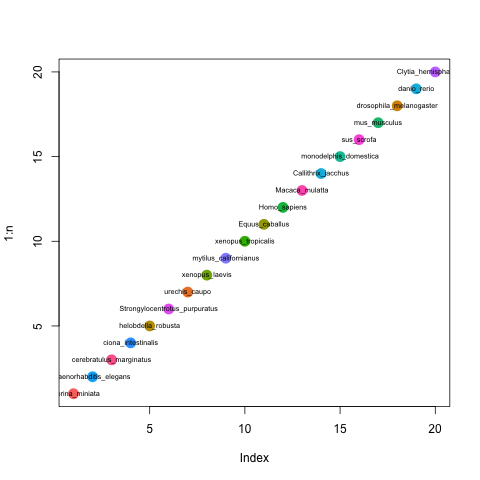

In [118]:
%%R
new_cols<-c("#F8766D","#00B0F6","#FF6A98","#35A2FF","#C09B00","#E76BF3","#EA8331","#7CAE00","#9590FF","#39B600","#A3A500","#00BB4E","#FF62BC","#00BAE0","#00C1A3","#FA62DB","#00BF7D","#D89000","#00BAE0","#C77CFF")
mapping_vector2<-setNames(object=as.character(new_cols),nm=labels)
plot(1:n, pch=16, cex=2, col=mapping_vector2)
text(1:n,labels=names(mapping_vector2),cex=0.6)

In [123]:
%%R 
mapping_vector2

             asterina_miniata        caenorhabditis_elegans 
                    "#F8766D"                     "#00B0F6" 
      cerebratulus_marginatus            ciona_intestinalis 
                    "#FF6A98"                     "#35A2FF" 
           helobdella_robusta Strongylocentrotus_purpuratus 
                    "#C09B00"                     "#E76BF3" 
                urechis_caupo                xenopus_laevis 
                    "#EA8331"                     "#7CAE00" 
        mytilus_californianus            xenopus_tropicalis 
                    "#9590FF"                     "#39B600" 
               Equus_caballus                  Homo_sapiens 
                    "#A3A500"                     "#00BB4E" 
               Macaca_mulatta            Callithrix_jacchus 
                    "#FF62BC"                     "#00BAE0" 
        monodelphis_domestica                    sus_scrofa 
                    "#00C1A3"                     "#FA62DB" 
                 mus_mus

Plot relationships.

###I. Mitotic spindle length (aster-to-aster) as a function of cell size.

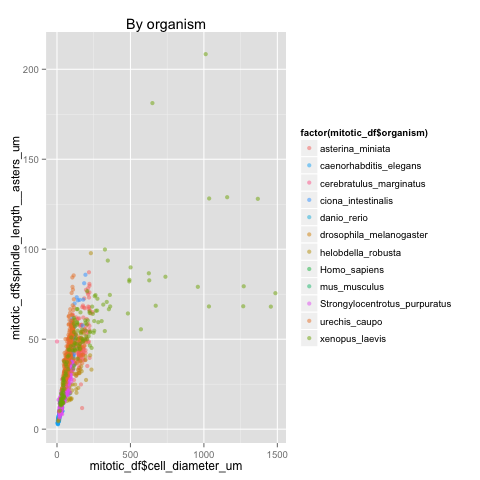

In [126]:
%%R
mitotic_df<-original[original$meiotic==0,]
plot_1<-ggplot()
plot_1<-plot_1+geom_point(data=mitotic_df,aes(x=mitotic_df$cell_diameter_um,y=mitotic_df$spindle_length__asters_um,colour=factor(mitotic_df$organism)),alpha=0.5)
plot_1+scale_colour_manual(values = mapping_vector2)+labs(title='By organism')

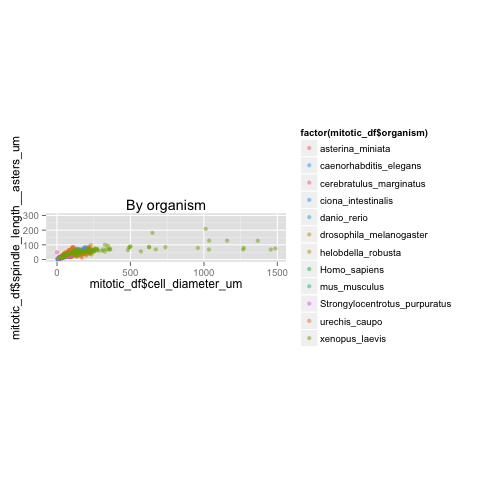

In [127]:
%%R
plot_1<-ggplot()
plot_1<-plot_1+geom_point(data=mitotic_df,aes(x=mitotic_df$cell_diameter_um,y=mitotic_df$spindle_length__asters_um,colour=factor(mitotic_df$organism)),alpha=0.5)
plot_1+scale_colour_manual(values = mapping_vector2)+coord_fixed()+ylim(c(0,300))+labs(title='By organism')

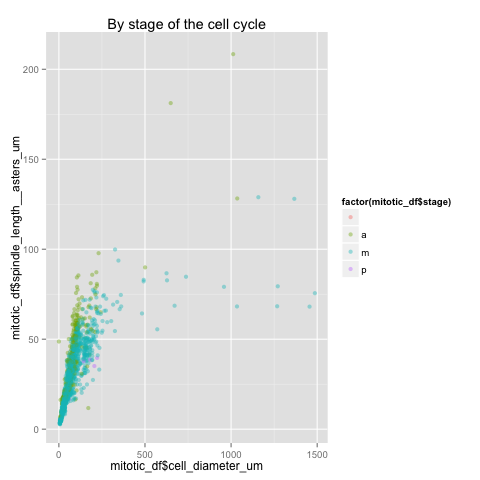

In [128]:
%%R
plot_1<-ggplot()
plot_1<-plot_1+geom_point(data=mitotic_df,aes(x=mitotic_df$cell_diameter_um,y=mitotic_df$spindle_length__asters_um,colour=factor(mitotic_df$stage)),alpha=0.4)
plot_1+labs(title='By stage of the cell cycle')

###II. Mitotic spindle length (pole-to-pole) as a function of cell size.

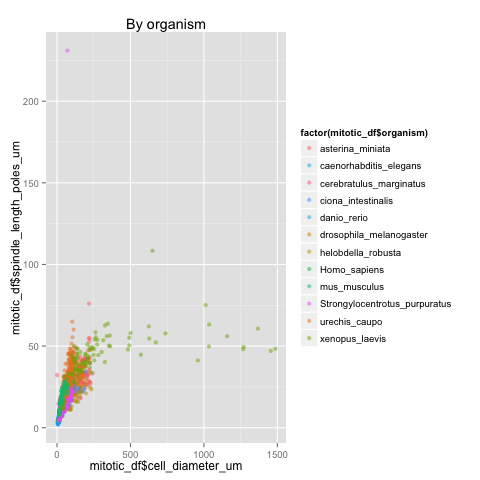

In [129]:
%%R
plot_1<-ggplot()
plot_1<-plot_1+geom_point(data=mitotic_df,aes(x=mitotic_df$cell_diameter_um,y=mitotic_df$spindle_length_poles_um,colour=factor(mitotic_df$organism)),alpha=0.5)
plot_1+scale_colour_manual(values = mapping_vector2)+labs(title='By organism')

There is something wrong with one point for Strongylocentrotus purpuratus. This is addressed below (when anaphase spindles are discussed in section V.).

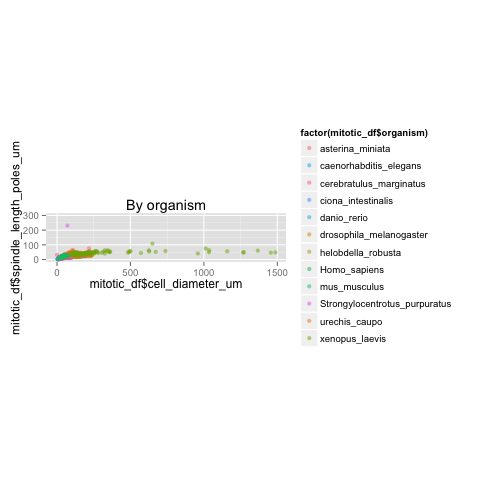

In [130]:
%%R
plot_1<-ggplot()
plot_1<-plot_1+geom_point(data=mitotic_df,aes(x=mitotic_df$cell_diameter_um,y=mitotic_df$spindle_length_poles_um,colour=factor(mitotic_df$organism)),alpha=0.5)
plot_1+scale_colour_manual(values = mapping_vector2)+coord_fixed()+ylim(c(0,300))+labs(title='By organism')



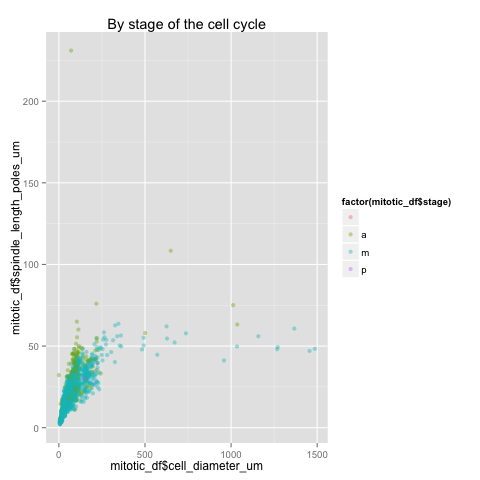

In [55]:
%%R
plot_1<-ggplot()
plot_1<-plot_1+geom_point(data=mitotic_df,aes(x=mitotic_df$cell_diameter_um,y=mitotic_df$spindle_length_poles_um,colour=factor(mitotic_df$stage)),alpha=0.4)
plot_1+labs(title='By stage of the cell cycle')

###III. For the paper: 

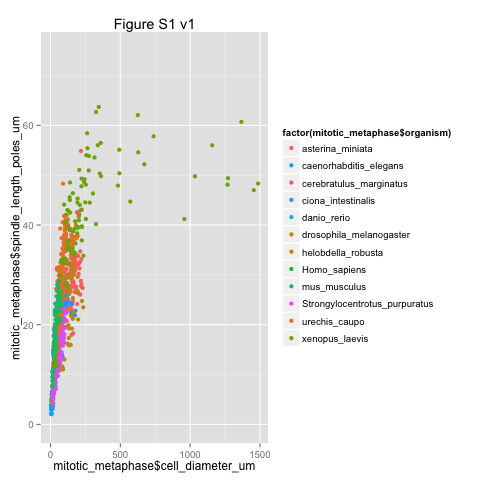

In [131]:
%%R
plot_f1_v1<-ggplot()
plot_f1_v1<-plot_f1_v1+geom_point(data=mitotic_metaphase,aes(x=mitotic_metaphase$cell_diameter_um,y=mitotic_metaphase$spindle_length_poles_um,colour=factor(mitotic_metaphase$organism)))
plot_f1_v1<-plot_f1_v1+scale_color_manual(values = mapping_vector2)
plot_f1_v1+ylim(c(0,75))+labs(title='Figure S1 v1')

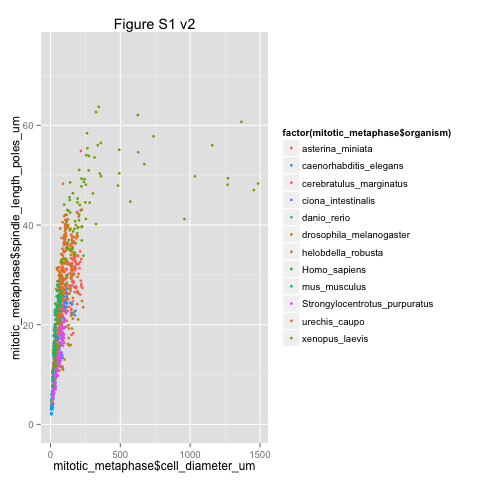

In [132]:
%%R
plot_f1_v2<-ggplot()
plot_f1_v2<-plot_f1_v2+geom_point(data=mitotic_metaphase,aes(x=mitotic_metaphase$cell_diameter_um,y=mitotic_metaphase$spindle_length_poles_um,colour=factor(mitotic_metaphase$organism)),size=1.3)
plot_f1_v2<-plot_f1_v2+scale_color_manual(values = mapping_vector2)
plot_f1_v2+ylim(c(0,75))+labs(title='Figure S1 v2')

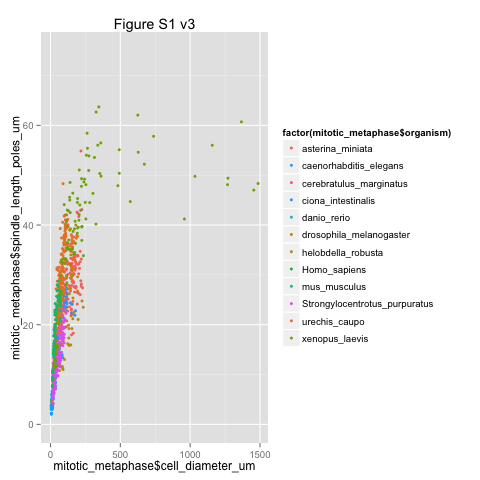

In [133]:
%%R
plot_f1_v2<-ggplot()
plot_f1_v2<-plot_f1_v2+geom_point(data=mitotic_metaphase,aes(x=mitotic_metaphase$cell_diameter_um,y=mitotic_metaphase$spindle_length_poles_um,colour=factor(mitotic_metaphase$organism)),size=1.4)
plot_f1_v2<-plot_f1_v2+scale_color_manual(values = mapping_vector2)
plot_f1_v2+ylim(c(0,75))+labs(title='Figure S1 v3')

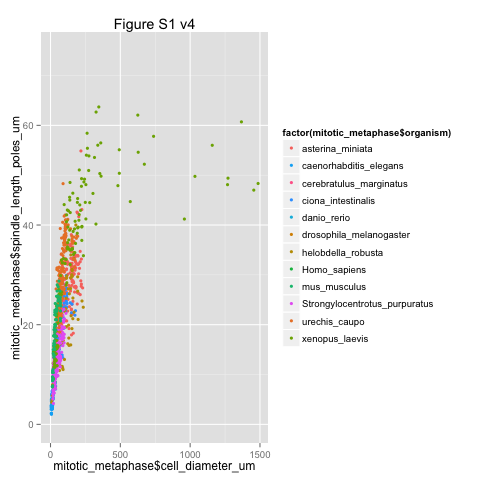

In [134]:
%%R
plot_f1_v2<-ggplot()
plot_f1_v2<-plot_f1_v2+geom_point(data=mitotic_metaphase,aes(x=mitotic_metaphase$cell_diameter_um,y=mitotic_metaphase$spindle_length_poles_um,colour=factor(mitotic_metaphase$organism)),size=1.5)
plot_f1_v2<-plot_f1_v2+scale_color_manual(values = mapping_vector2)
plot_f1_v2+ylim(c(0,75))+labs(title='Figure S1 v4')

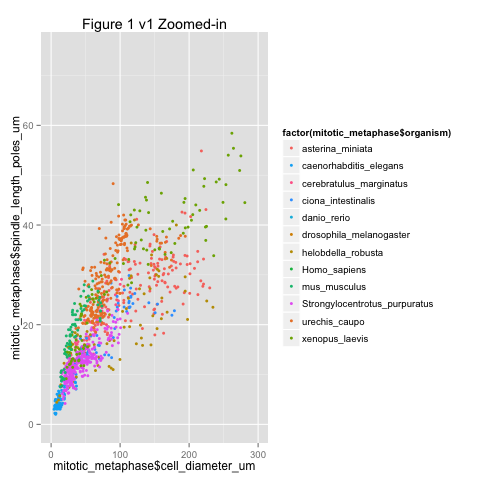

In [135]:
%%R
plot_f1_v3_300<-ggplot()
plot_f1_v3_300<-plot_f1_v3_300+geom_point(data=mitotic_metaphase,aes(x=mitotic_metaphase$cell_diameter_um,y=mitotic_metaphase$spindle_length_poles_um,colour=factor(mitotic_metaphase$organism)),size=1.4)
plot_f1_v3_300<-plot_f1_v3_300+scale_color_manual(values = mapping_vector2)
plot_f1_v3_300+ylim(c(0,75))+xlim(c(0,300))+labs(title='Figure 1 v1 Zoomed-in')

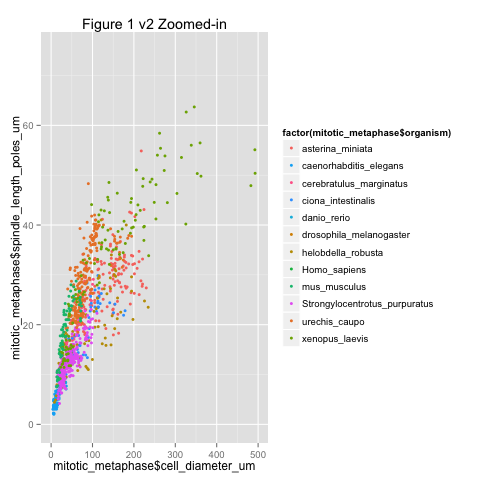

In [136]:
%%R
plot_f1_v3_500<-ggplot()
plot_f1_v3_500<-plot_f1_v3_500+geom_point(data=mitotic_metaphase,aes(x=mitotic_metaphase$cell_diameter_um,y=mitotic_metaphase$spindle_length_poles_um,colour=factor(mitotic_metaphase$organism)),size=1.4)
plot_f1_v3_500<-plot_f1_v3_500+scale_color_manual(values = mapping_vector2)
plot_f1_v3_500+ylim(c(0,75))+xlim(c(0,500))+labs(title='Figure 1 v2 Zoomed-in')

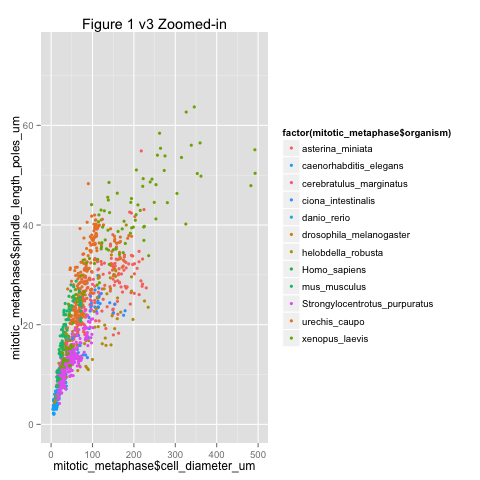

In [137]:
%%R
plot_f1_v3_500<-ggplot()
plot_f1_v3_500<-plot_f1_v3_500+geom_point(data=mitotic_metaphase,aes(x=mitotic_metaphase$cell_diameter_um,y=mitotic_metaphase$spindle_length_poles_um,colour=factor(mitotic_metaphase$organism)),size=1.5)
plot_f1_v3_500<-plot_f1_v3_500+scale_color_manual(values = mapping_vector2)
plot_f1_v3_500+ylim(c(0,75))+xlim(c(0,500))+labs(title='Figure 1 v3 Zoomed-in')

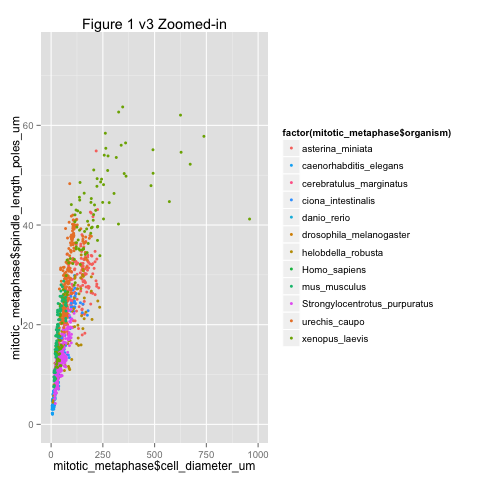

In [138]:
%%R
plot_f1_v3_1000<-ggplot()
plot_f1_v3_1000<-plot_f1_v3_1000+geom_point(data=mitotic_metaphase,aes(x=mitotic_metaphase$cell_diameter_um,y=mitotic_metaphase$spindle_length_poles_um,colour=factor(mitotic_metaphase$organism)),size=1.4)
plot_f1_v3_1000<-plot_f1_v3_1000+scale_color_manual(values = mapping_vector2)
plot_f1_v3_1000+ylim(c(0,75))+xlim(c(0,1000))+labs(title='Figure 1 v3 Zoomed-in')

###IV. LOESS (Local regression)

These plots are not part of the paper.

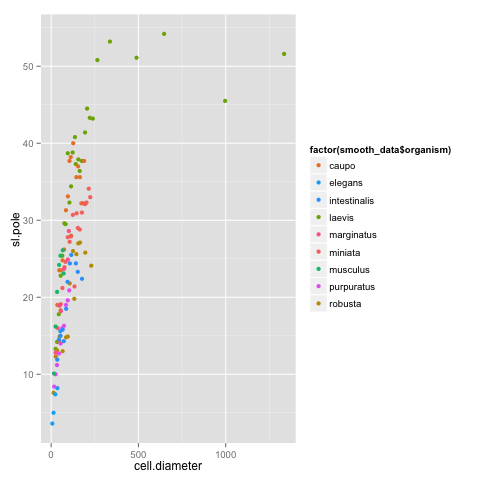

In [72]:
%%R
smooth_data<-read.csv('../Data/MitoticScaling_Binnedmeans_SD_reformatted.csv')
mapping_vector_labs_2<-as.character(lapply(strsplit(names(mapping_vector),'_'),function(x){x[2]}))
mapping_vector_labs_2<-setNames(mapping_vector_labs_2,seq(1,length(mapping_vector_labs_2)))
mapping_vector2_2<-setNames(mapping_vector2,mapping_vector_labs_2)
qplot(cell.diameter,y=sl.pole,data=smooth_data,colour=factor(smooth_data$organism))+scale_colour_manual(values = mapping_vector2_2)

Filter out organisms, which do not have enough examples (rows) to perform local regression. The binned data will be used for that.


In [74]:
%%R
parse_cats<-strsplit(as.character(unique(mitotic_metaphase$organism)),"_")
vector_for_filter<-unlist(lapply(parse_cats,function(x){x[2]}))
filtered_mm<-mitotic_metaphase[unlist(lapply(strsplit(as.character(mitotic_metaphase$organism),"_"),function(x){x[2]})) %in% unique(smooth_data$organism),]

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


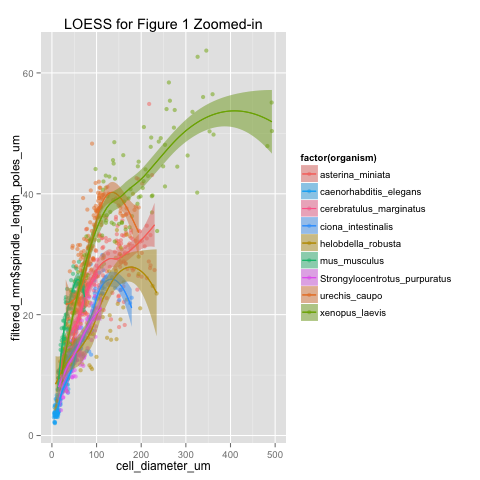

In [139]:
%%R
plot<-ggplot(filtered_mm,aes(cell_diameter_um, filtered_mm$spindle_length_poles_um,colour=factor(organism)))
plot<-plot+geom_point(alpha=0.5)+geom_smooth(na.rm=TRUE,alpha=0.2)
plot<-plot+stat_smooth(aes(fill=factor(organism)))+xlim(c(0,500))
plot<-plot+scale_colour_manual(values = mapping_vector2)
plot+scale_fill_manual(values = mapping_vector2)+labs(title='LOESS for Figure 1 Zoomed-in')

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


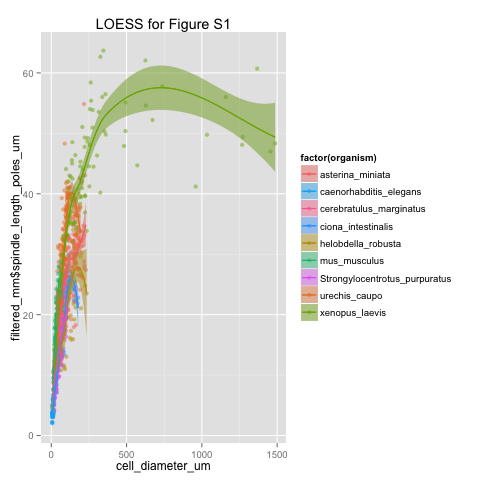

In [140]:
%%R
plot<-ggplot(filtered_mm,aes(cell_diameter_um, filtered_mm$spindle_length_poles_um,colour=factor(organism)))
plot<-plot+geom_point(alpha=0.5)+geom_smooth(na.rm=TRUE,alpha=0.2)
plot<-plot+stat_smooth(aes(fill=factor(organism)))
plot<-plot+scale_colour_manual(values = mapping_vector2)
plot+scale_fill_manual(values = mapping_vector2)+labs(title='LOESS for Figure S1')

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


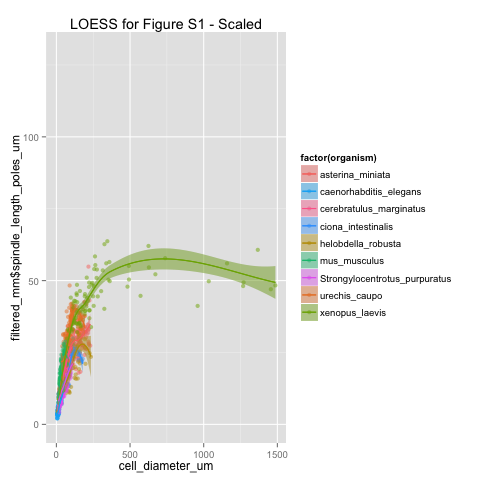

In [141]:
%%R
plot<-ggplot(filtered_mm,aes(cell_diameter_um, filtered_mm$spindle_length_poles_um,colour=factor(organism)))
plot<-plot+geom_point(alpha=0.5)+geom_smooth(na.rm=TRUE,alpha=0.2)
plot<-plot+stat_smooth(aes(fill=factor(organism)))+ylim(0,130)
plot<-plot+scale_colour_manual(values = mapping_vector2)
plot+scale_fill_manual(values = mapping_vector2)+labs(title='LOESS for Figure S1 - Scaled')

The plot above (spindle length measured from pole-to-pole) can be compared to the plot below (spindle length measured from aster-to-aster).

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


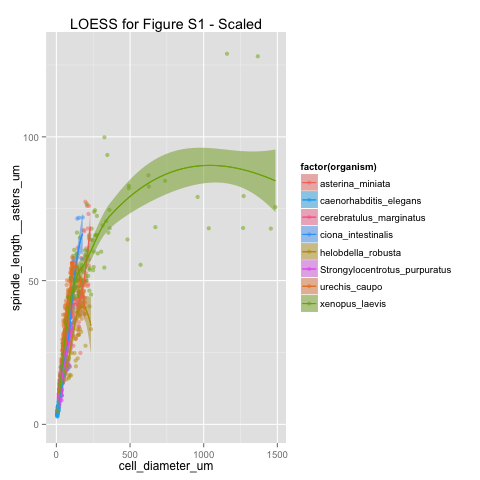

In [142]:
%%R
plot2<-ggplot(data=filtered_mm[!filtered_mm$organism=='mus_musculus',],aes(x=cell_diameter_um, y=spindle_length__asters_um,colour=factor(organism)))
plot2<-plot2+geom_point(na.rm=TRUE,alpha=0.5) +geom_smooth(na.rm=TRUE,alpha=0.2)
plot2<-plot2+stat_smooth(aes(fill=factor(organism)))+ylim(0,130)
plot2<-plot2+scale_colour_manual(values = mapping_vector2)
plot2+scale_fill_manual(values = mapping_vector2)+labs(title='LOESS for Figure S1 - Scaled')

###V. Plotting spindle length for anaphase spindles.

In [210]:
%%R
mitotic_anaphase<-read.csv('../Data/mitotic_anaphase.csv')
mitotic_anaphase$organism<-as.character(mitotic_anaphase$organism)

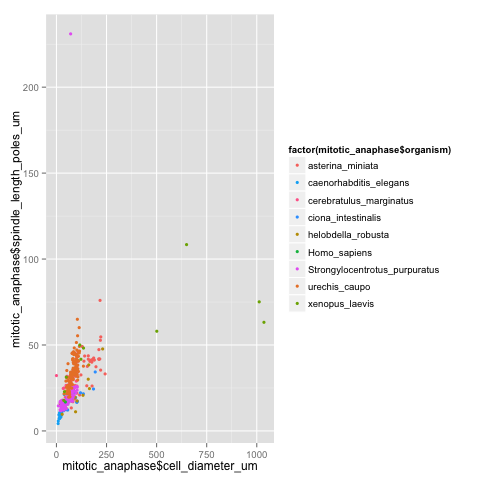

In [143]:
%%R
plot_S1C<-ggplot()
plot_S1C<-plot_S1C+geom_point(data=mitotic_anaphase,aes(x=mitotic_anaphase$cell_diameter_um,y=mitotic_anaphase$spindle_length_poles_um,colour=factor(mitotic_anaphase$organism)),size=1.5)
plot_S1C<-plot_S1C+scale_color_manual(values = mapping_vector2)
plot_S1C#+ylim(c(0,75))+xlim(c(0,500))

There is something wrong with the max spindle pole length. We will try to diagnose the issue below.
We will either fix the value error or remove the problematic value (max spindle pole length) from the data frame.

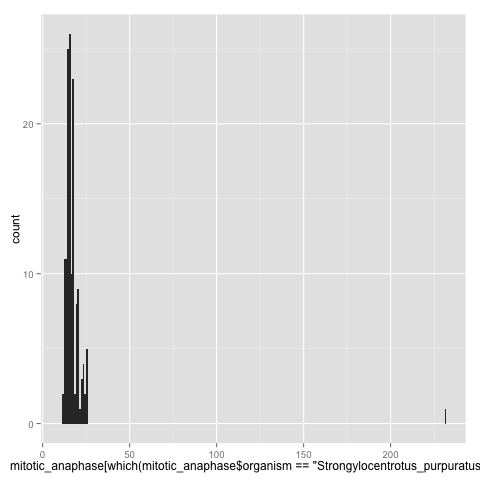

In [211]:
%%R
ggplot()+geom_histogram(aes(x=mitotic_anaphase[which(mitotic_anaphase$organism=='Strongylocentrotus_purpuratus'),]$spindle_length_poles_um),binwidth=1) 

The last point looks like an outlier. Let's try to identify it. 

In [212]:
%%R
print(mitotic_anaphase[which(mitotic_anaphase$spindle_length_poles_um==max(mitotic_anaphase$spindle_length_poles_um,na.rm=TRUE)),])
print(mitotic_anaphase[which(mitotic_anaphase$spindle_length_poles_um==max(mitotic_anaphase$spindle_length_poles_um,na.rm=TRUE)),]$spindle_length_poles_um)

    aster.to.pole_distance_2_um astere.to.pole_distance_1_um cell_diameter_um
272                           0                            0             70.8
    centrosome chromosomes classification classification_CAT cleavage_type
272          1          42             bd                  1           rah
    cleavage_type_CAT day_old distance_between_chromosomes_um fixation
272                 1  140425                               6       df
    fixation_CAT genome inner_aster_diameter_1_um inner_aster_diameter_2_um
272            2    814                      10.2                       9.8
    metaphase_plate_aspect_ratio_um metaphase_plate_lengt_h_um
272                              NA                       10.4
    metaphase_plate_width_um microscope microscope_CAT num_of_cells
272                       NA     zlsm40              3            2
    num_of_cells_CAT num_of_cells_NUM                      organism
272                2                2 Strongylocentrotus_purpuratus
  

Looks like in the row 272, in the case of S. purpuratus, there is a point, which claims to have a spindle size of 231 µm. Highly unlikely. Let's see how unlikely.

First, we'll take only S. purpuratus data.

In [213]:
%%R
subset.purpuratus=mitotic_anaphase[mitotic_anaphase$organism=="Strongylocentrotus_purpuratus",]
print(mean(subset.purpuratus$spindle_length_poles_um,na.rm=TRUE,trim=0.1))
print(mean(subset.purpuratus$spindle_length_poles_um,na.rm=TRUE))

[1] 16.39441
[1] 18.22281


Compare the two means. There clearly is an outlier issue.

In [214]:
%%R
scaled.p2p.purpuratus=scale(subset.purpuratus$spindle_length_poles_um)
#print(sd(mitotic_anaphase$spindle_length_poles_um,na.rm=TRUE))
#scaled.p2p=scale(mitotic_anaphase$spindle_length_poles_um)
zscores=(subset.purpuratus$spindle_length_poles_um-mean(subset.purpuratus$spindle_length_poles_um,na.rm=TRUE))/sd(subset.purpuratus$spindle_length_poles_um,na.rm=TRUE)


In [215]:
%%R
print(max(zscores))

print(1-pt(max(zscores),length(subset.purpuratus$spindle_length_poles_um-2)))
print(1-pnorm(max(zscores)))

print(which(zscores==max(zscores)))
print(subset.purpuratus$spindle_length_poles_um[which(zscores==max(zscores))])

[1] 11.67775
[1] 0
[1] 0
[1] 126
[1] 231


The probability to obtain such a large spindle is 0. Marina says it is a faulty comma.

In [216]:
%%R
print(which(mitotic_anaphase$spindle_length_poles_um==max(mitotic_anaphase$spindle_length_poles_um,na.rm=TRUE))) #row 272
mitotic_anaphase[272,]$spindle_length_poles_um<-mitotic_anaphase[272,]$spindle_length_poles_um/10
print(mitotic_anaphase[which(mitotic_anaphase$spindle_length_poles_um==max(mitotic_anaphase$spindle_length_poles_um,na.rm=TRUE)),]$cell_diameter_um)

[1] 272
[1] 649.5


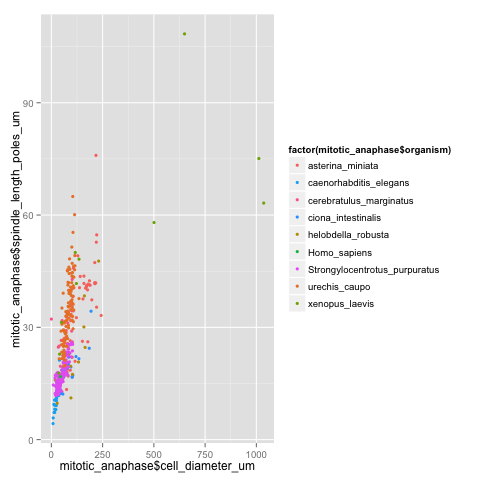

In [218]:
%%R
plot_S1C<-ggplot()
plot_S1C<-plot_S1C+geom_point(data=mitotic_anaphase,aes(x=mitotic_anaphase$cell_diameter_um,y=mitotic_anaphase$spindle_length_poles_um,colour=factor(mitotic_anaphase$organism)),size=1.5)
plot_S1C<-plot_S1C+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_S1C#+ylim(c(0,75))+xlim(c(0,500))

Looks like there is an issue with one of the cell diamter coordinates too.

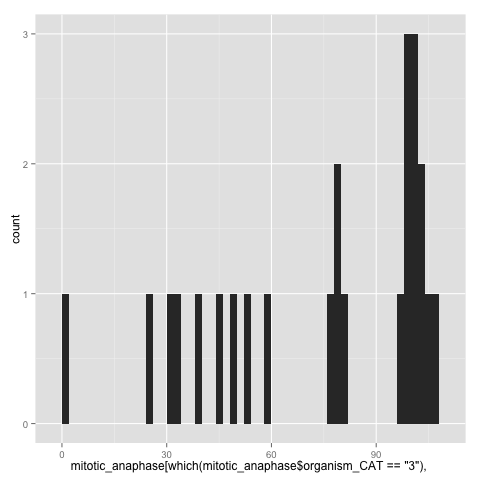

In [220]:
%%R
ggplot()+geom_histogram(aes(x=mitotic_anaphase$cell_diameter_um),binwidth=10)
mitotic_anaphase[which(mitotic_anaphase$cell_diameter_um==min(mitotic_anaphase$cell_diameter_um,na.rm=TRUE)),]
ggplot()+geom_histogram(aes(x=mitotic_anaphase[which(mitotic_anaphase$organism_CAT=='3'),]$cell_diameter_um),binwidth=2)

It is not so clear what the issue is there. We will just remove it.

In [222]:
%%R
mitotic_anaphase<-mitotic_anaphase[which(mitotic_anaphase$cell_diameter_um!=min(mitotic_anaphase$cell_diameter_um,na.rm=TRUE)),]


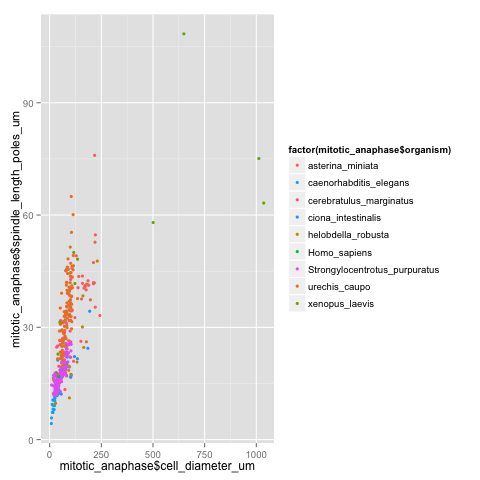

In [224]:
%%R
plot_S1C<-ggplot()
plot_S1C<-plot_S1C+geom_point(data=mitotic_anaphase,aes(x=mitotic_anaphase$cell_diameter_um,y=mitotic_anaphase$spindle_length_poles_um,colour=factor(mitotic_anaphase$organism)),size=1.5)
plot_S1C<-plot_S1C+scale_color_manual(values = mapping_vector2)
plot_S1C

LOESS for anaphase spindles.

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


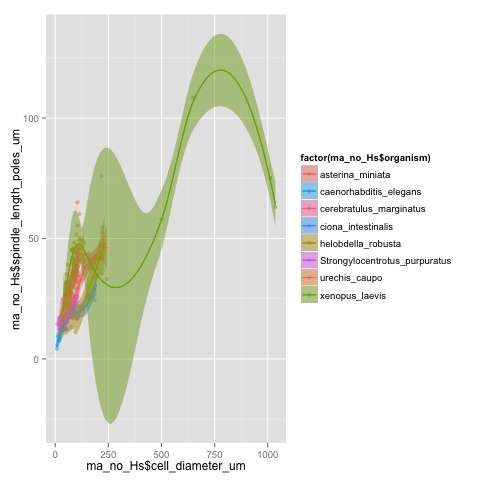

In [228]:
%%R
ma_no_Hs<-mitotic_anaphase[which(mitotic_anaphase$organism!="Homo_sapiens"),]
plotS1C_LOESS<-ggplot(data=ma_no_Hs,aes(x=ma_no_Hs$cell_diameter_um,y=ma_no_Hs$spindle_length_poles_um,colour=factor(ma_no_Hs$organism)))
plotS1C_LOESS<-plotS1C_LOESS+geom_point(alpha=0.5)
plotS1C_LOESS<-plotS1C_LOESS+geom_smooth(na.rm=TRUE,alpha=0.2)
plotS1C_LOESS<-plotS1C_LOESS+stat_smooth(aes(fill=factor(ma_no_Hs$organism)))
plotS1C_LOESS<-plotS1C_LOESS+scale_colour_manual(values = mapping_vector2)
plotS1C_LOESS<-plotS1C_LOESS+scale_fill_manual(values = mapping_vector2)
plotS1C_LOESS



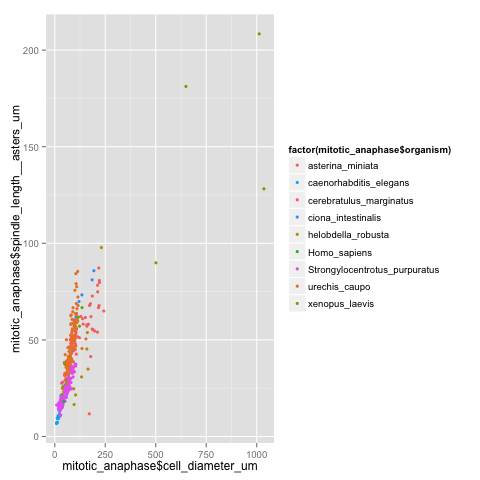

In [233]:
%%R
plotS1D<-ggplot()
plotS1D<-plotS1D+geom_point(data=mitotic_anaphase,aes(x=mitotic_anaphase$cell_diameter_um,y=mitotic_anaphase$spindle_length__asters_um,colour=factor(mitotic_anaphase$organism)),size=1.5)
plotS1D<-plotS1D+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plotS1D#+ylim(c(0,75))+xlim(c(0,500))

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


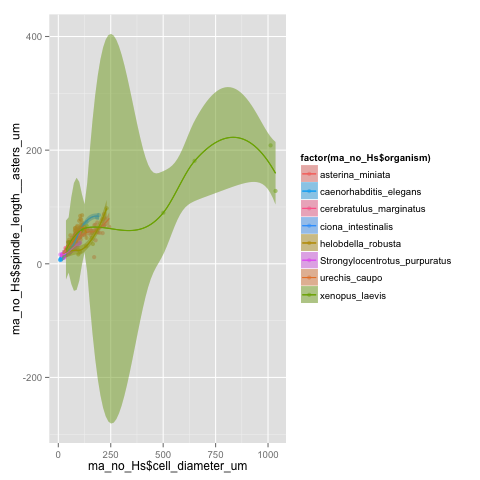

In [232]:
%%R
ma_no_Hs<-mitotic_anaphase[which(mitotic_anaphase$organism!="Homo_sapiens"),]
plotS1D_LOESS<-ggplot(data=ma_no_Hs,aes(x=ma_no_Hs$cell_diameter_um,y=ma_no_Hs$spindle_length__asters_um,colour=factor(ma_no_Hs$organism)))
plotS1D_LOESS<-plotS1D_LOESS+geom_point(alpha=0.5)
plotS1D_LOESS<-plotS1D_LOESS+geom_smooth(na.rm=TRUE,alpha=0.2)
plotS1D_LOESS<-plotS1D_LOESS+stat_smooth(aes(fill=factor(ma_no_Hs$organism)))
plotS1D_LOESS<-plotS1D_LOESS+scale_colour_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plotS1D_LOESS<-plotS1D_LOESS+scale_fill_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plotS1D_LOESS

###Centrosome diameter (figure S1)

The input file is created in 'spider plots' notebooks. Have a look there for details.

In [237]:
%%R
inner_diam_mit_met=read.csv('../Data/inner_aster_diam_cell_sizeDF_mit_met_Jan2015.csv')
inner_diam_mit_met_copy=inner_diam_mit_met[which(!inner_diam_mit_met$inner_aster_diam_AVG>50),]


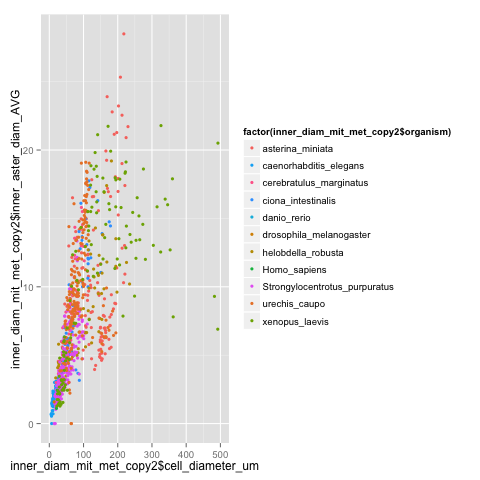

In [245]:
%%R
inner_diam_mit_met_copy2=inner_diam_mit_met_copy[inner_diam_mit_met_copy$inner_aster_diam_AVG!=max(inner_diam_mit_met_copy[which(inner_diam_mit_met_copy$organism=='Strongylocentrotus_purpuratus'),]$inner_aster_diam_AVG),]
plot_Jan2015<-ggplot()
plot_Jan2015<-plot_Jan2015+geom_point(data=inner_diam_mit_met_copy2,aes(x=inner_diam_mit_met_copy2$cell_diameter_um,y=inner_diam_mit_met_copy2$inner_aster_diam_AVG,colour=factor(inner_diam_mit_met_copy2$organism)),size=1.5)
plot_Jan2015<-plot_Jan2015+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_Jan2015+xlim(c(0,500))# +ylim(c(0,75))+xlim(c(0,500))